# The Sparks Foundation

## Data Science and Business Analytics (GRIPJUNE'21)

## Task 1: Prediction Using Supervised ML
We will develop a model which will be capable of predicting the percentage of marks that a student is expected to score based upon the number of hours they studied.
 
## Algorithm: Linear Regression
We will be using Simple Linear Regression Algorithm in order to complete the task as it involves just two variables.


### Author:  Amarjeet
### Dataset: http://bit.ly/w-data
### ML Library: Scikit-Learn




### So let's get started

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
data = pd.read_csv('C:\\Users\\Dell no.1\\Desktop\\Amarjeet\\Coursera\\Python for machine learning and data science\\Sparks foundation\\student_scores.csv')
print('Data imported successfully')

Data imported successfully


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Performing Exploratory Data Analysis (EDA)
Check if there any relationship between 'Hours' of study and 'Scores' of a student, by using Discriptive Statistics and Visualisation.

In [5]:
# Descriptive Statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Correlation 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Scatter Plot

In [7]:
sns.set(style= 'darkgrid')

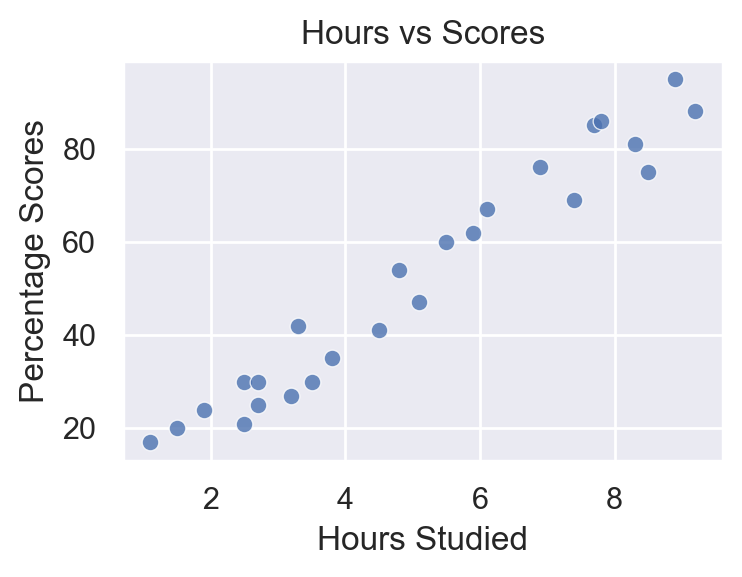

In [8]:
# Create a figure using matplotlib library
fig = plt.figure(figsize=(3,2), dpi=200)

# Add axes
axes = fig.add_axes([0,0,1,1])

# Add labels and title
axes.set_xlabel('Hours Studied')
axes.set_ylabel('Percentage Scores')
axes.set_title('Hours vs Scores')

# scatterplot using seaborn library
sns.scatterplot(x='Hours', y='Scores', data = data, alpha=0.8)

plt.show()

#### Distribution of Data

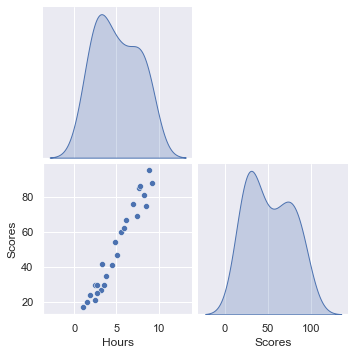

In [9]:
sns.pairplot(data, diag_kind = 'kde', corner= True)

plt.show()

### Introducing Scikit Learn for Creating a Linear Regression Model

#### Separate Label and Features i.e. divide the data into "features" (inputs) and "label" (output).

In [10]:
# Feature (Hours)
X = data.drop('Scores',axis=1)

# label (Scores)
y = data['Scores']

#### Train | Test Split

In [11]:
from sklearn.model_selection import train_test_split

#### Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.18, random_state=42)

#### Training the algorithm

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Slope coefficient
model.coef_

array([9.68207815])

In [17]:
# Intercept Coef
model.intercept_

2.826892353899737

#### Regression line 

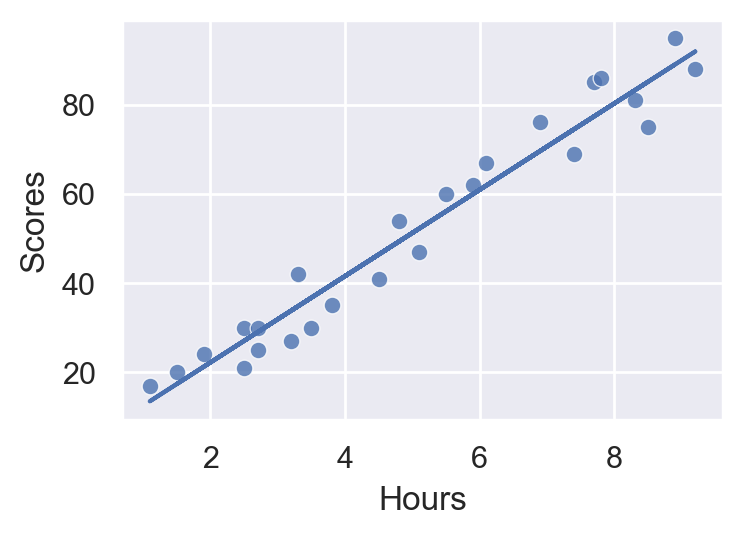

In [18]:
fig = plt.figure(figsize=(3,2), dpi=200)
axes = fig.add_axes([0,0,1,1])

# Regression Line
line = model.intercept_ + model.coef_*X

#plot
axes.plot(X, line)
sns.scatterplot(x='Hours', y='Scores', data=data,  ax=axes, alpha=0.8)

plt.show()


#### Predict the testing set

In [19]:
y_pred = model.predict(X_test)

In [20]:
Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [21]:
Prediction

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### Evaluating the model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)

# Mean Squarred error
MSE = mean_squared_error(y_test, y_pred)

# Root mean squarred error
RMSE = np.sqrt(MSE)

In [24]:
MAE

3.9207511902099244

In [25]:
RMSE

4.352380006653288

#### Test residual plot

In [26]:
test_residual = y_test - y_pred

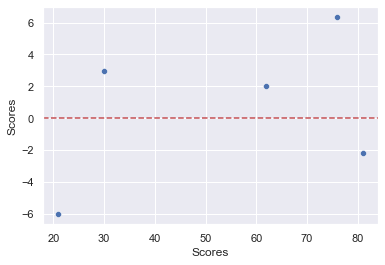

vertical distance of points from dashed line is the test residual


In [27]:
sns.scatterplot(x=y_test, y = test_residual)

plt.axhline(y=0, color ='r', linestyle= '--')
plt.show()

print('vertical distance of points from dashed line is the test residual')

### Retraining Model on full data
Now after evaluating the model, we are satisfied with the model so we will retrain the model on full data in order to make the best use of given data

In [28]:
final_model = LinearRegression()

In [29]:
final_model.fit(X,y)

LinearRegression()

In [30]:
reg_coef = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
reg_coef = reg_coef.append(pd.DataFrame(final_model.intercept_, index = ['intercept'], columns = ['Coefficient']))

print('Regression coefficients')
reg_coef

Regression coefficients


,Coefficient
Hours,9.775803
intercept,2.483673


#### Regression line

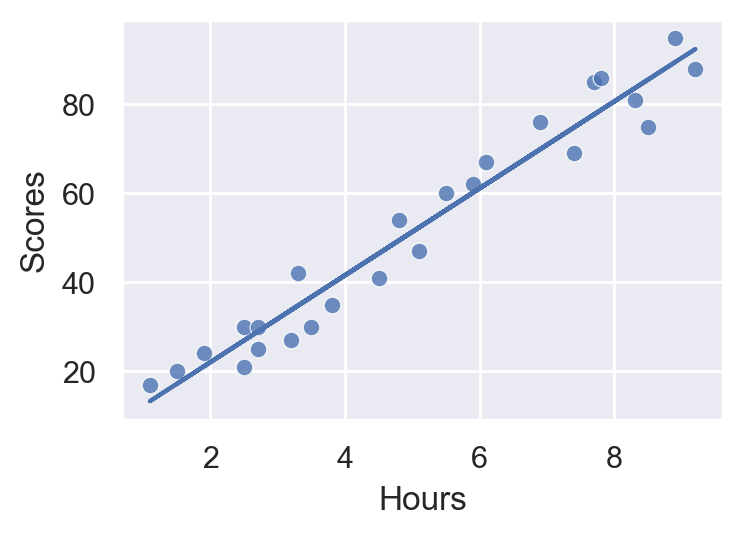

In [31]:
fig = plt.figure(figsize=(3,2), dpi=200)
axes = fig.add_axes([0,0,1,1])

# Regression Line
line = final_model.intercept_ + final_model.coef_*X

#plot
axes.plot(X, line)
sns.scatterplot(x='Hours', y='Scores', data=data,  ax=axes, alpha=0.8)

plt.show()


### Making Prediction
What will be predicted score if a student studies for 9.25 hrs/ day?

In [32]:
pred_score = final_model.predict([[9.25]])

print('if a student studies for 9.25 hrs/day, then the predicted score would be {}'.format(pred_score[0]))

if a student studies for 9.25 hrs/day, then the predicted score would be 92.90985477015731


## Thank You